# <font size=14> Women and Child Health: Analysis of NFHS-4 Data </font>
National Family Health Survey, 4 (2015-2016) - India

- Data for this project has been taken from https://data.gov.in/
- Link to the dataset: https://data.gov.in/catalog/key-indicators-national-family-health-survey-nfhs
<br> </br>



# <font size=10> Data Analysis - Influence of Contraception Awareness on other variables related to women and child health </font>



# 1. Correlation Analysis and selection of relevant variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
df = pd.read_csv('./../Data/working_data/normalised_data_6.csv')
df.drop(df.columns[[0]], axis = 1, inplace = True) 

pd.set_option('display.max_columns', 30)
df.corr()['19. Any modern method (%)']

Households surveyed                                                                             -0.145286
Women age 15-49 years interviewed                                                               -0.151322
Men age 15-49 years interviewed                                                                 -0.038394
1. Population (female) age 6+ years who ever attended school (%)                                 0.150158
3. Sex ratio of the total population (females per 1000 males)                                   -0.253559
4. Sex ratio at birth for children born in the last five years (females per 1000 males)         -0.063573
7. Households with an improved drinking-water source1 (%)                                        0.136614
8. Households using improved sanitation facility2 (%)                                            0.259278
9. Households using clean fuel for cooking3 (%)                                                  0.298658
12. Women who are literate (%)                

In [2]:
attributes_contraception = ['19. Any modern method (%)','12. Women who are literate (%)',
 '13. Men who are literate (%)' , 
'14. Women with 10 or more years of schooling (%)' ,
'30. Mothers who had at least 4 antenatal care visits (%)' , '40. Institutional births (%)' ,
'53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)',
'32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
 '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
                            '91. Cervix (%)' , '92. Breast (%)' ]


In [3]:
len(attributes_contraception)

11

**We will be carrying out clustering and association rule mining to analyse the effect of contraception awareness on the above mentioned attributes**

# 2. Clustering Analysis  

## 2.1 K-Means Clustering Implementation

In [4]:


#function to assign clusters
def AssignClusters(df,centroids):
  assigned_clusters={}
  N = df.shape[0]
  k = len(centroids.keys())
  for i in range(N):
    distances={}
    for j in range(k):
      distances[j+1]=np.linalg.norm(df.iloc[i].to_numpy()-centroids[j+1])
    minval = min(distances.values())
    res = [k for k, v in distances.items() if v==minval]
    assigned_clusters[i]=res[0]
    distances.clear()

  return assigned_clusters

def centeroidnp(arr):
    length, dim = arr.shape
    return np.array([np.sum(arr[:, i])/length for i in range(dim)])

#function to update centroids
def update(df,l,assigned_clusters):

  N = len(assigned_clusters.keys())
  k = len(l.keys())
  for j in range(k):
    datapoints=[]
    for i in range(N):
      if(assigned_clusters[i]==j+1):
        datapoints.append(df.iloc[i].tolist())
    datapointsArray = np.asarray(datapoints)
    
    l[j+1]=centeroidnp(datapointsArray).tolist()

  return l

#Function to perform K means clustering on the data frame df and the desired number of clusters = num_clusters
def KMeansClustering(df, num_clusters):
    #N is the number of samples
    #D is the number of features
    N, D = df.shape
    
    np.random.seed(450)
    k = num_clusters

    
    # centroids[i] = [x1,x2,x3 . .. . .. . xD]
    centroids = {
    
        i+1 : df.iloc[np.random.randint(0,N)].tolist()
        for i in range(k)

    }
    #centroids contains K randomly selected data points 
  

    #Assign clusters to each data point.
    assigned_clusters=AssignClusters(df,centroids)
 
    #Update Centroids
    centroids=update(df,centroids,assigned_clusters)
    
    #Repeating assignment stage...
    assigned_clusters=AssignClusters(df,centroids)
    
    itr = 0
    while True:
      clusters=assigned_clusters.copy()
    
      centroids = update(df,centroids,assigned_clusters)
        
      assigned_clusters = AssignClusters(df, centroids)
 
      if(clusters==assigned_clusters or itr==1000):
        break
        
      itr+=1

    return list(clusters.values()), list(centroids.values())

## 2.2 Loading the required dataframes

In [5]:
#since dataframe df contained the normalised data, we will load the same into df_normalised. The input for k-means clustering should be normalised
df_normalised = df[attributes_contraception]
df_normalised.columns

Index(['19. Any modern method (%)', '12. Women who are literate (%)',
       '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '40. Institutional births (%)',
       '53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
       '91. Cervix (%)', '92. Breast (%)'],
      dtype='object')

In [6]:
#load discrete values in df_discrete
df_discrete = pd.read_csv('./../Data/working_data/equal_frequency_discretised_data_7.csv')
df_discrete.drop(df_discrete.columns[[0]], axis = 1, inplace = True) 


## 2.3 clustering on the basis of contraception awareness: % of women using any modern method of contraception

In [7]:

df_cluster_1 = df_normalised[['19. Any modern method (%)']]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
cluster_centers

[[-1.2176350736178], [1.1332961825396606], [0.03858522666000667]]

**The cluster centers indicate that the clusters 0 , 1 and 2 correspond to districts having low , high and medium  % of women using modern methods of contraception**

## Influence of contraception awareness in mothers on child immunisation rates

In [9]:
df_cluster_1['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']= df_discrete['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:


#separate dataframes for points belonging to each cluster
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0
# for each cluster, find the proportion of points that belong to low, medium and high target categories.
l = dfC0[dfC0['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.5128205128205128
0.3282051282051282
0.15897435897435896
C1
0.1417910447761194
0.3333333333333333
0.5248756218905473
C2
0.348
0.336
0.316


It is clear that of all the districts that belong to cluster 0 (corresponding to low % of women using modern methods of contraception ), 51.2% have 'low' child immunisation rates, and a 15.8% have 'high' immunisation rates. On the other hand, of all the points that belong to  cluster 1,(corresponding to high % of f women using modern methods of contraception), 52.4% have 'high' immunisation rates and 14% have 'low'  immunisation rates. <br>
**Contraceptive awareness has a significant effect on child immunisation rates.**


In [11]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='low']
dfc111=df11.loc[df11['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='medium']
dfc211=df11.loc[df11['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='low']
dfc121=df21.loc[df21['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='medium']
dfc221=df21.loc[df21['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='low']
dfc131=df31.loc[df31['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='medium']
dfc231=df31.loc[df31['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)']=='high']

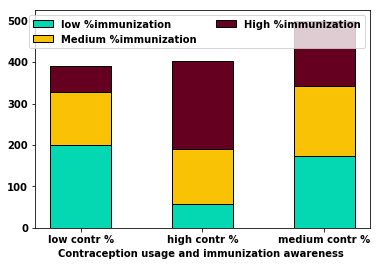

In [12]:

# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean(),
         dfc021['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean(),
         dfc031['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean()]


bars2 = [dfc111['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean(),
        dfc121['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean(),
        dfc131['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean()]


bars3 = [dfc211['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean(),
        dfc221['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean(),
        dfc231['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['low contr %','high contr %','medium contr %']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:aquamarine', edgecolor='black', width=barWidth, label='low %immunization')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:goldenrod', edgecolor='black', width=barWidth, label='Medium %immunization')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:maroon', edgecolor='black', width=barWidth, label='High %immunization')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contraception usage and immunization awareness ", weight='bold')
plt.legend(loc=0, ncol=2)
 
# Show graphic
plt.savefig('./../Plots/RESULT PLOTS/plot17.png')
plt.show()

## Influence of contraception awareness in mothers on % of children who received vitamin A dose

In [13]:
df_cluster_1['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']  = df_discrete['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.5051282051282051
0.34615384615384615
0.14871794871794872
C1
0.12935323383084577
0.34577114427860695
0.5248756218905473
C2
0.364
0.312
0.324



It is clear that of all the districts that belong to cluster 0 (corresponding to low % of women using modern methods of contraception ), 50.5% have 'low' % of children who received vitamin A dose, and only 14.8 % have 'high' percentage for the same. On the other hand, of all the points that belong to  cluster 1,(corresponding to high % of f women using modern methods of contraception), 52.4% have 'high' % of children who received vitamin A dose and 14% have 'low'  % of children who received vitamin A dose.



In [15]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]#low
dfc011=df11.loc[df11['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='low']
dfc111=df11.loc[df11['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='medium']
dfc211=df11.loc[df11['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]#high
dfc021=df21.loc[df21['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='low']
dfc121=df21.loc[df21['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='medium']
dfc221=df21.loc[df21['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]#medium
dfc031=df31.loc[df31['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='low']
dfc131=df31.loc[df31['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='medium']
dfc231=df31.loc[df31['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)']=='high']

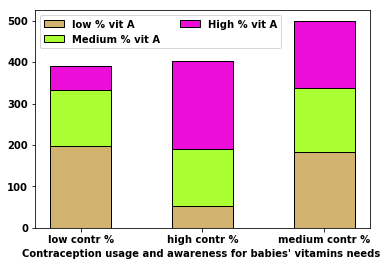

In [16]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean(),
         dfc021['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean(),
         dfc031['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean()]


bars2 = [dfc111['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean(),
        dfc121['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean(),
        dfc131['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean()]


bars3 = [dfc211['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean(),
        dfc221['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean(),
        dfc231['53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['low contr %','high contr %','medium contr %']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:tan', edgecolor='black', width=barWidth, label='low % vit A')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:lime', edgecolor='black', width=barWidth, label='Medium % vit A')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High % vit A')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contraception usage and awareness for babies' vitamins needs ", weight='bold')
plt.legend(loc=0, ncol=2)
 
# Show graphic
plt.savefig('./../Plots/RESULT PLOTS/plot18.png')
plt.show()

## Influence of contraception awareness in mothers on % of  Mothers who had at least 4 antenatal care visits

In [17]:
df_cluster_1['30. Mothers who had at least 4 antenatal care visits (%)'] = df_discrete['30. Mothers who had at least 4 antenatal care visits (%)'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['30. Mothers who had at least 4 antenatal care visits (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['30. Mothers who had at least 4 antenatal care visits (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['30. Mothers who had at least 4 antenatal care visits (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['30. Mothers who had at least 4 antenatal care visits (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['30. Mothers who had at least 4 antenatal care visits (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['30. Mothers who had at least 4 antenatal care visits (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['30. Mothers who had at least 4 antenatal care visits (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['30. Mothers who had at least 4 antenatal care visits (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['30. Mothers who had at least 4 antenatal care visits (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.6743589743589744
0.2153846153846154
0.11025641025641025
C1
0.1044776119402985
0.3482587064676617
0.5472636815920398
C2
0.252
0.412
0.336


It is clear that of all the districts that belong to cluster 0 (corresponding to low % of women using modern methods of contraception ), 67.4% have 'low' % of women who had atleast 4 antenatal care visits, and only 11 % have 'high' percentage of the same. On the other hand, of all the districts that belong to  cluster 1,(corresponding to high % of  women using modern methods of contraception), 54.7% have 'high' % of women who had atleast 4 antenatal care visits  and only 10% have 'low' % of women who had atleast 4 antenatal care visits.

**Women who are aware about the use of contraceptives, are more concerned about family planning and hence take better decisions about their maternal health (during pregnancy).**


In [19]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]#low
dfc011=df11.loc[df11['30. Mothers who had at least 4 antenatal care visits (%)']=='low']
dfc111=df11.loc[df11['30. Mothers who had at least 4 antenatal care visits (%)']=='medium']
dfc211=df11.loc[df11['30. Mothers who had at least 4 antenatal care visits (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]#high
dfc021=df21.loc[df21['30. Mothers who had at least 4 antenatal care visits (%)']=='low']
dfc121=df21.loc[df21['30. Mothers who had at least 4 antenatal care visits (%)']=='medium']
dfc221=df21.loc[df21['30. Mothers who had at least 4 antenatal care visits (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]#medium
dfc031=df31.loc[df31['30. Mothers who had at least 4 antenatal care visits (%)']=='low']
dfc131=df31.loc[df31['30. Mothers who had at least 4 antenatal care visits (%)']=='medium']
dfc231=df31.loc[df31['30. Mothers who had at least 4 antenatal care visits (%)']=='high']

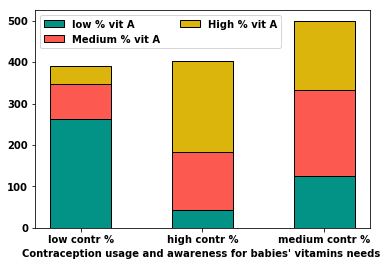

In [20]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean(),
         dfc021['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean(),
         dfc031['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean()]


bars2 = [dfc111['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean(),
        dfc121['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean(),
        dfc131['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean()]


bars3 = [dfc211['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean(),
        dfc221['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean(),
        dfc231['30. Mothers who had at least 4 antenatal care visits (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['low contr %','high contr %','medium contr %']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:teal', edgecolor='black', width=barWidth, label='low % vit A')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:coral', edgecolor='black', width=barWidth, label='Medium % vit A')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:gold', edgecolor='black', width=barWidth, label='High % vit A')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contraception usage and awareness for babies' vitamins needs ", weight='bold')
plt.legend(loc=0, ncol=2)
 
# Show graphic
plt.savefig('./../Plots/RESULT PLOTS/plot19.png')
plt.show()

## Influence of contraception awareness in mothers on % of Institutional births (eg. Hospitals)

In [21]:
df_cluster_1['40. Institutional births (%)'] = df_discrete['40. Institutional births (%)'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['40. Institutional births (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['40. Institutional births (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['40. Institutional births (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['40. Institutional births (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['40. Institutional births (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['40. Institutional births (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['40. Institutional births (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['40. Institutional births (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['40. Institutional births (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.6230769230769231
0.28205128205128205
0.09487179487179487
C1
0.10945273631840796
0.3407960199004975
0.5497512437810945
C2
0.29
0.364
0.346



It is clear that of all the districts that belong to cluster 0 (corresponding to low % of women using modern methods of contraception ), 62.3% have 'low' percentage of institutional births, and only 9.4% have 'high' percentage of institutional births. On the other hand, of all the points that belong to  cluster 1,(corresponding to high % of women using modern methods of contraception), 54.9% have 'high' percentage of institutional births and 10.9% have 'low' percentage of institutional births
**Women who are aware about the use of contraceptives, are more concerned about family planning and hence take better decisions about the health of their children by opting for safer delivery options like institutional births.**


In [23]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]#low
dfc011=df11.loc[df11['40. Institutional births (%)']=='low']
dfc111=df11.loc[df11['40. Institutional births (%)']=='medium']
dfc211=df11.loc[df11['40. Institutional births (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]#high
dfc021=df21.loc[df21['40. Institutional births (%)']=='low']
dfc121=df21.loc[df21['40. Institutional births (%)']=='medium']
dfc221=df21.loc[df21['40. Institutional births (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]#medium
dfc031=df31.loc[df31['40. Institutional births (%)']=='low']
dfc131=df31.loc[df31['40. Institutional births (%)']=='medium']
dfc231=df31.loc[df31['40. Institutional births (%)']=='high']

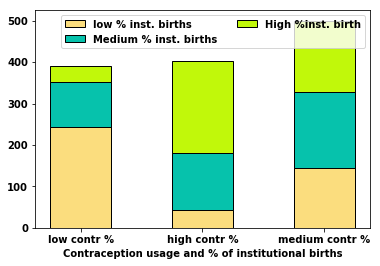

In [24]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['40. Institutional births (%)'].value_counts().values.mean(),
         dfc021['40. Institutional births (%)'].value_counts().values.mean(),
         dfc031['40. Institutional births (%)'].value_counts().values.mean()]


bars2 = [dfc111['40. Institutional births (%)'].value_counts().values.mean(),
        dfc121['40. Institutional births (%)'].value_counts().values.mean(),
        dfc131['40. Institutional births (%)'].value_counts().values.mean()]


bars3 = [dfc211['40. Institutional births (%)'].value_counts().values.mean(),
        dfc221['40. Institutional births (%)'].value_counts().values.mean(),
        dfc231['40. Institutional births (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['low contr %','high contr %','medium contr %']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:wheat', edgecolor='black', width=barWidth, label='low % inst. births')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:turquoise', edgecolor='black', width=barWidth, label='Medium % inst. births')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:chartreuse', edgecolor='black', width=barWidth, label='High %inst. birth')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contraception usage and % of institutional births", weight='bold')
plt.legend(loc=0, ncol=2)
 
# Show graphic
plt.savefig('./../Plots/RESULT PLOTS/plot20.png')
plt.show()

## Influence of contraception awareness in mothers on % of women who went for Cervix and Breast cancer checkups

In [25]:
df_cluster_1['91. Cervix (%)'] = df_discrete['91. Cervix (%)'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['91. Cervix (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['91. Cervix (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['91. Cervix (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['91. Cervix (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['91. Cervix (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['91. Cervix (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['91. Cervix (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['91. Cervix (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['91. Cervix (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.5128205128205128
0.39487179487179486
0.09230769230769231
C1
0.16666666666666666
0.25870646766169153
0.5746268656716418
C2
0.328
0.346
0.326


In [27]:
df_cluster_1['92. Breast (%)']  = df_discrete['92. Breast (%)'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['92. Breast (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['92. Breast (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['92. Breast (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['92. Breast (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['92. Breast (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['92. Breast (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['92. Breast (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['92. Breast (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['92. Breast (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.47692307692307695
0.36923076923076925
0.15384615384615385
C1
0.1865671641791045
0.26119402985074625
0.5522388059701493
C2
0.348
0.354
0.298



It is clear that of all the districts that belong to cluster 0 (corresponding to 'low' % of women using modern methods of contraception ), 47.6% and 51.2% of districts have a 'low' % of women went for breast cancer and cervix cancer checkups respectively. On the other hand, of all the points that belong to  cluster 1 (corresponding to 'high' % of women using modern methods of contraception ), 55.2% and 57.4% of districts have a 'high' % of women went for breast cancer and cervix cancer checkups respectively. 
<br>
**Women who are aware about use of contraception are more concerned about their own health and take better decisions in this regard (such as going for regular checkups of cervix and breast cancer.)**


In [29]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]#low
dfc011=df11.loc[df11['91. Cervix (%)']=='low']
dfc111=df11.loc[df11['91. Cervix (%)']=='medium']
dfc211=df11.loc[df11['91. Cervix (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]#high
dfc021=df21.loc[df21['91. Cervix (%)']=='low']
dfc121=df21.loc[df21['91. Cervix (%)']=='medium']
dfc221=df21.loc[df21['91. Cervix (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]#medium
dfc031=df31.loc[df31['91. Cervix (%)']=='low']
dfc131=df31.loc[df31['91. Cervix (%)']=='medium']
dfc231=df31.loc[df31['91. Cervix (%)']=='high']

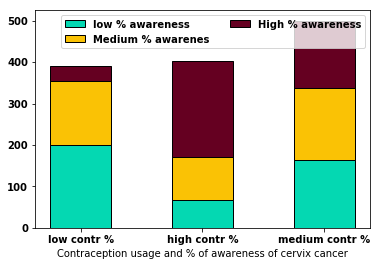

In [30]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['91. Cervix (%)'].value_counts().values.mean(),
         dfc021['91. Cervix (%)'].value_counts().values.mean(),
         dfc031['91. Cervix (%)'].value_counts().values.mean()]


bars2 = [dfc111['91. Cervix (%)'].value_counts().values.mean(),
        dfc121['91. Cervix (%)'].value_counts().values.mean(),
        dfc131['91. Cervix (%)'].value_counts().values.mean()]


bars3 = [dfc211['91. Cervix (%)'].value_counts().values.mean(),
        dfc221['91. Cervix (%)'].value_counts().values.mean(),
        dfc231['91. Cervix (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['low contr %','high contr %','medium contr %']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:aquamarine', edgecolor='black', width=barWidth, label='low % awareness')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:goldenrod', edgecolor='black', width=barWidth, label='Medium % awarenes')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:maroon', edgecolor='black', width=barWidth, label='High % awareness')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contraception usage and % of awareness of cervix cancer")
plt.legend(loc=0, ncol=2)
 
# Show graphic
plt.savefig('./../Plots/RESULT PLOTS/plot21.png')
plt.show()

In [31]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]#low
dfc011=df11.loc[df11['92. Breast (%)']=='low']
dfc111=df11.loc[df11['92. Breast (%)']=='medium']
dfc211=df11.loc[df11['92. Breast (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]#high
dfc021=df21.loc[df21['92. Breast (%)']=='low']
dfc121=df21.loc[df21['92. Breast (%)']=='medium']
dfc221=df21.loc[df21['92. Breast (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]#medium
dfc031=df31.loc[df31['92. Breast (%)']=='low']
dfc131=df31.loc[df31['92. Breast (%)']=='medium']
dfc231=df31.loc[df31['92. Breast (%)']=='high']

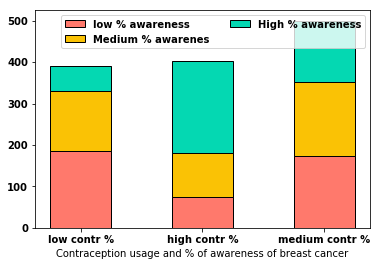

In [32]:
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['92. Breast (%)'].value_counts().values.mean(),
         dfc021['92. Breast (%)'].value_counts().values.mean(),
         dfc031['92. Breast (%)'].value_counts().values.mean()]


bars2 = [dfc111['92. Breast (%)'].value_counts().values.mean(),
        dfc121['92. Breast (%)'].value_counts().values.mean(),
        dfc131['92. Breast (%)'].value_counts().values.mean()]


bars3 = [dfc211['92. Breast (%)'].value_counts().values.mean(),
        dfc221['92. Breast (%)'].value_counts().values.mean(),
        dfc231['92. Breast (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['low contr %','high contr %','medium contr %']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:salmon', edgecolor='black', width=barWidth, label='low % awareness')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:goldenrod', edgecolor='black', width=barWidth, label='Medium % awarenes')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:aquamarine', edgecolor='black', width=barWidth, label='High % awareness')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Contraception usage and % of awareness of breast cancer")
plt.legend(loc=0, ncol=2)
 
# Show graphic
plt.savefig('./../Plots/RESULT PLOTS/plot22.png')
plt.show()

# 3. Association Rule Mining to identify factors that affect child stunting

In [33]:
df_apriori = pd.read_csv('./../Data/working_data/equal_frequency_discretised_data_7.csv')
df_apriori.drop(df_apriori.columns[[0]], axis = 1, inplace = True) 
df_apriori = df_apriori[['19. Any modern method (%)','12. Women who are literate (%)',
 '13. Men who are literate (%)' , 
'14. Women with 10 or more years of schooling (%)' ,
'30. Mothers who had at least 4 antenatal care visits (%)' , '40. Institutional births (%)' ,
'53. Children age 9-59 months who received a vitamin A dose in last 6 months (%)',
'32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
 '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
                            '91. Cervix (%)' , '92. Breast (%)'
                        ]]

In [34]:
df_apriori

,19. Any modern method (%),12. Women who are literate (%),13. Men who are literate (%),14. Women with 10 or more years of schooling (%),30. Mothers who had at least 4 antenatal care visits (%),40. Institutional births (%),53. Children age 9-59 months who received a vitamin A dose in last 6 months (%),32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%),47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%),91. Cervix (%),92. Breast (%)
0,low,high,high,medium,medium,low,low,low,medium,medium,low
1,low,high,high,medium,medium,low,low,low,medium,medium,low
2,low,medium,high,low,low,low,low,low,low,medium,low
3,low,medium,high,medium,low,low,low,low,low,medium,low
4,low,high,high,medium,medium,low,low,medium,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...
1287,low,high,high,high,medium,low,low,low,medium,medium,low
1288,low,high,medium,medium,low,low,low,low,medium,medium,low
1289,low,high,high,high,low,low,low,low,medium,medium,low
1290,low,medium,medium,low,low,low,low,low,low,medium,low


In [35]:
cols = df_apriori.columns
df_apriori = df_apriori.values
df_apriori = df_apriori.tolist()

## 3.1 Conversion of categorical attributes into a suitable input for association rule mining (assymetric binary attributes)

each attribute will be converted from attribute_name to attribute_name - low , attribute_name - med , attribute_name - high

In [36]:
for row in df_apriori:
  for i in range(len(row)):
    row[i] = cols[i] + ' ' + row[i]

## 3.2 Implementation of Association Rule Mining (Using Apriori Algorithm)

In [37]:
# Functions to perform associarion rule mining
def GetRecords(dfApriori):

  for listt in dfApriori:
      recordToYield = frozenset(listt)  
      yield recordToYield

dfApriori = df_apriori
records_ = GetRecords(dfApriori)
print(type(records_))
print(records_)

import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
   
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
       
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
   
    itemSet, transactionList = getItemSetTransactionList(data_iter)
    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules
    #C-1 itemset
    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)
    #freq-1 itemset
    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            return float(freqSet[item])/len(transactionList)

            
#largeSet dict contains the freq Itemsets
    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in largeSet.items():
      if not key==0:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


<class 'generator'>
<generator object GetRecords at 0x11bc1f0d0>


**We mined association rules which satisfied a support threshold of 0.15 and confidence threshold of 0.5**

In [38]:
items_, rules_ = runApriori(records_, 0.15, 0.50)


## 3.3 Frequent Itemsets (Support > 0.15) containing the attribute 'Any Modern Method of Contraception Use - high'

In [39]:

for complete_tuple in items_:
    itemset = complete_tuple[0]
    if('19. Any modern method (%) high' in itemset):
        print(complete_tuple)
        print("\n\n")

(('19. Any modern method (%) high',), 0.33359133126934987)



(('47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%) high', '19. Any modern method (%) high'), 0.17105263157894737)



(('91. Cervix (%) high', '19. Any modern method (%) high'), 0.18808049535603716)



(('53. Children age 9-59 months who received a vitamin A dose in last 6 months (%) high', '19. Any modern method (%) high'), 0.17414860681114552)



(('14. Women with 10 or more years of schooling (%) high', '19. Any modern method (%) high'), 0.16640866873065016)



(('30. Mothers who had at least 4 antenatal care visits (%) high', '19. Any modern method (%) high'), 0.1826625386996904)



(('92. Breast (%) high', '19. Any modern method (%) high'), 0.18188854489164086)



(('40. Institutional births (%) high', '19. Any modern method (%) high'), 0.1826625386996904)



(('32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%) high', '19. Any modern me

## 3.4 Association Rules (Confidence > 0.5) containing the attribute 'Any Modern Method of Contraception Use - high' as its precondition (antecedent)

In [40]:
for complete_tuple in rules_:
    rule = complete_tuple[0]
    antecedent = rule[0]
    consequent = rule[1] 
    if('19. Any modern method (%) high' in antecedent and len(antecedent)==1):
        print(str(antecedent)+' ---> '+str(consequent))
        conf = complete_tuple[1]
        print('CONFIDENCE is: '+str(conf))
        print("\n\n")

('19. Any modern method (%) high',) ---> ('47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%) high',)
CONFIDENCE is: 0.5127610208816705



('19. Any modern method (%) high',) ---> ('91. Cervix (%) high',)
CONFIDENCE is: 0.5638051044083526



('19. Any modern method (%) high',) ---> ('53. Children age 9-59 months who received a vitamin A dose in last 6 months (%) high',)
CONFIDENCE is: 0.5220417633410673



('19. Any modern method (%) high',) ---> ('30. Mothers who had at least 4 antenatal care visits (%) high',)
CONFIDENCE is: 0.5475638051044083



('19. Any modern method (%) high',) ---> ('92. Breast (%) high',)
CONFIDENCE is: 0.5452436194895591



('19. Any modern method (%) high',) ---> ('40. Institutional births (%) high',)
CONFIDENCE is: 0.5475638051044083



('19. Any modern method (%) high',) ---> ('32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%) high',)
CONFIDENCE is: 0.5150812064965198



